# **Testes de Hipóteses**

Uma hipótese estatística é uma suposição sobre determinado parâmetro da população, como
média, desvio-padrão, coeficiente de correlação, etc. Um teste de hipótese é um procedimento para decisão
sobre a veracidade ou falsidade de determinada hipótese. Para que uma hipótese estatística seja validada ou rejeitada
com certeza, seria necessário examinarmos toda a população, o que na prática é inviável. Como alternativa,
extraímos uma amostra aleatória da população de interesse. Como a decisão é tomada com base na amostra, podem
ocorrer erros (rejeitar uma hipótese quando ela for verdadeira ou não rejeitar uma hipótese quando ela for
falsa), como será visto mais adiante.

## **Teste bilateral**

considerar X uma variável associada a uma população e *θ* determinado parâmetro dessa população. Devemos definir a hipótese a ser testada sobre o parâmetro *θ* dessa população, que é chamada de hipótese nula:

**Ho: *θ* = *θo*.** 

Definiremos também a hipótese alternativa (H1), caso H0 seja rejeitada, que pode ser caracterizada da seguinte forma:

**H1: *θ* ≠ *θo*.** 

e o teste é chamado de teste bilateral (ou bicaudal).
O nível de significância (α) de um teste representa a probabilidade de rejeitar a hipótese nula quando ela for
verdadeira (é um dos dois tipos de erros que podem ocorrer, conforme veremos a seguir). A região crítica (RC)
de um teste bilateral é representada por duas caudas de tamanhos iguais, respectivamente ria extremidade esquerda
e direita da curva de distribuição, e cada uma delás corresponde à metade do nível de significância α, conforme
mostra a Figura.

<img src="https://www.professorguru.com.br/images/regiao-critica-teste-bilateral.png">

## **Teste unilateral à esquerda**

Outra forma de definir a hipótese alternativa (H1) seria:

**H1: *θ* < *θo*.**

e o teste é chamado unilateral (ou unicaudal) à esquerda. Nesse caso, a região crítica está na cauda esquerda da distribuição e corresponde ao nível de significância α. Quando o objetivo for verificar se um parâmetro é significativamente inferior a determinado valor, utilizamos um teste unilateral à esquerda, como mostra a Figura abaixo.

<img src="https://www.professorguru.com.br/images/regiao-critica-teste-unilateral-a-esquerda.png">

## **Teste unilateral à direita**

Outra forma de definir a hipótese alternativa (H1) seria:

**H1: *θ* > *θo*.**

e o teste é chamado unilateral (ou unicaudal) à direita. Nesse caso, a região crítica está na cauda direita da distribuição e corresponde ao nível de significância α. Quando o objetivo for verificar se um parâmetro é significativamente superior a determinado valor, utilizamos um teste unilateral à direita, como mostra a Figura abaixo.

<img src="https://www.professorguru.com.br/images/regiao-critica-teste-unilateral-a-esquerda.png">


# **P-valor**

Uma forma de comparar estatisticamente a hipótese é comparar o valor da estatística calculada dos dados com o valor crítico para o nível de significância. É possível obter o p-valor para a estatística calculada e , em seguida, compará-lo ao nível de significância escolhido.

* *Se p-valor < α :* **rejeita-se a Ho**
* *Se p-valor > α :* **não rejeita Ho**

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import random
import scipy.stats as stats

## **Teste Z para médias de uma amostra**

O teste Z é aplicado quando o desvio-padrão populacional é conhecido e a distribuição da variável é normal (ou utilizando grandes amostras)

**EXEMPLO:** Uma empresa de embalagens deseja verificar se a quantidade de caixas que está sendo produzida está de acordo com seu padrão histórico, pois existe indícios de que o consumo aumentou. Historicamente são utilizados em média 100g de papelão em uma caixa e um desvio-padrão de 5g. Coletou-se uma amostra e deseja-se verificar se a média atual é maior que a média histórica. 


In [26]:
# parâmetros da distribuição da população
media_p = 100 #média populacional
std_p = 12 # desvio-padrão populacional
N = 1000 #tamanho da população

# Gere a distribuição Z
historico = np.random.normal(loc=media_p, scale=std_p, size=N)

# parâmetros da distribuição da amostra
media_a = 104 #média amostral
n = 40 #tamanho da amostra

# Gerando amostra 
amostra = np.random.normal(loc=media_a, size=n) #amostra

Definimos a Hipótese nula (Ho) e Hipótese alternativa (H1)

* Ho: As médias são iguais
* H1: A média atual é maior do que o histórico
* nível de significânci α = 5%

Dessa forma vemos que o teste será unilateral à direita

estatística z: 2.11
valor crítico: 1.64


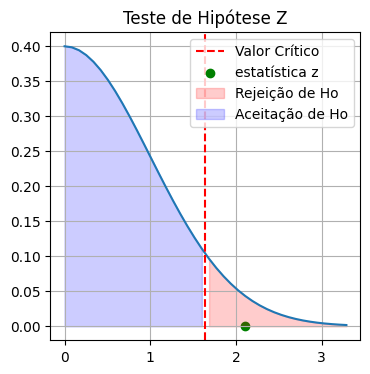

A média atual é maior do que o histórico


In [28]:
Ho = 'As médias são iguais'
H1 = 'A média atual é maior do que o histórico'
alpha = 0.05 #nível de significância

#calculando estatística z
z = (media_a - media_p)/(std_p/np.sqrt(n))
print(f'estatística z: {z:.2f}')

valor_critico = stats.norm.ppf(1 - alpha) # tabela
print(f'valor crítico: {valor_critico:.2f}')

x = np.linspace(0, 2 * valor_critico, n)
y = stats.norm.pdf(x) #distribuição z

plt.figure(figsize=(4,4))
plt.plot(x, y)
plt.axvline(x=valor_critico, color='red', linestyle='--', label=f'Valor Crítico')
plt.scatter(z, 0, color='green', marker='o', label='estatística z')
plt.fill_between(x, 0, y, where=(x >= valor_critico), color='red', alpha=0.2, label='Rejeição de Ho')
plt.fill_between(x, 0, y, where=(x <= valor_critico), color='blue', alpha=0.2, label='Aceitação de Ho')


plt.title(f'Teste de Hipótese Z')
plt.legend()
plt.grid(True)
plt.show()

if z > valor_critico:
    print(H1)
else:
    print(Ho)


## **Teste T para médias de uma amostra**

O teste T é aplicado quando o desvio-padrão populacional **não** é conhecido e a distribuição da variável é normal (ou utilizando grandes amostras)

**EXEMPLO:** O tempo médio de processamento de uma máquina é de 18 minutos, após alguns reparos para deminuir esse tempo, foram coletadas amostras de 25 máquinas, obtendo o tempo médio de 16,8 minutos com desvio padrão de 2,7. Verifique se há melhora no processo. 

estatística t: -2.22
valor crítico: -2.49


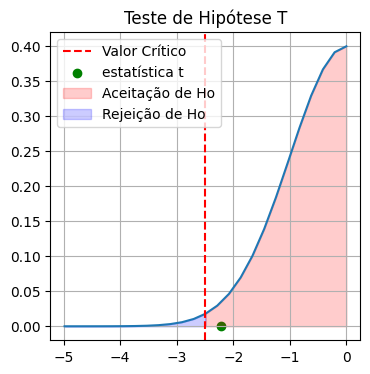

O tempo médio é igual


In [33]:
Ho = 'O tempo médio é igual'
H1 = 'O tempo médio é menor que o histórico'
alpha = 0.01 #nível de significância

n = 25 #tamanho da amostra
media_a = 16.8 #média amostral
std_a = 2.7 #desvio-padrão amostral

media_p = 18 #média histórica

t = (media_a - media_p)/(std_a/np.sqrt(n))
print(f'estatística t: {t:.2f}')

valor_critico = stats.t.ppf(alpha, n-1)
print(f'valor crítico: {valor_critico:.2f}')

x = np.linspace(0, 2 * valor_critico, n)
y = stats.norm.pdf(x) #distribuição t

plt.figure(figsize=(4,4))
plt.plot(x, y)
plt.axvline(x=valor_critico, color='red', linestyle='--', label=f'Valor Crítico')
plt.scatter(t, 0, color='green', marker='o', label='estatística t')
plt.fill_between(x, 0, y, where=(x >= valor_critico), color='red', alpha=0.2, label='Aceitação de Ho')
plt.fill_between(x, 0, y, where=(x <= valor_critico), color='blue', alpha=0.2, label='Rejeição de Ho')


plt.title(f'Teste de Hipótese T')
plt.legend()
plt.grid(True)
plt.show()

if z > valor_critico:
    print(Ho)
else:
    print(H1)